In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
# import seaborn as sns

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.style.use('ggplot')

In [2]:
df = pd.read_excel("base_praca_de_pagamento.xlsx")

## Informações sensíveis
Retirar informações sensíveis dos clientes para sigilo dos dados. Todos os dados serao convertidos para numericos

In [3]:
all_classes = list(df["CLASSE"].unique())
not_unknow = list()
for i in (all_classes):
    if(not i.startswith("Unknow")):
        not_unknow.append(i)
not_unknow

['Nao Praca (Dados ausente)',
 'Praca Fraca',
 'Nao Praca',
 'Praca Forte (Dados ausente) ',
 'Praca Forte']

In [4]:
df_not_unknow = pd.DataFrame()
for i in not_unknow:
    df_not_unknow = pd.concat([df_not_unknow, df[df["CLASSE"] == i]])
df_not_unknow.head()

,CEDENTE,CNPJ_CEDENTE,CEP_SEDE_CEDENTE,UF_SEDE_CEDENTE,CIDADE_SEDE_CEDENTE,LATITUDE_CEDENTE_SEDE,LONGITUDE_CEDENTE_SEDE,CEP_COBRANCA_CEDENTE,UF_COBRANCA_CEDENTE,CIDADE_COBRANCA_CEDENTE,...,CORRETOR,REGIONAL,SUPERINTENDENTE,ASSISTENTE,Ced x Sac,Ced x Ag. Sac,Ag. Ced x Ag. Sac,Sac x Ag. Sac,LIMITE,CLASSE
0,EBF VAZ INDUSTRIA E COMERCIO LTDA,159451000176,31123010,SP,São Paulo,NaN,NaN,13211840.0,SP,Jundiaí,...,Carlos Alberto Otero de Matos,Claudio Roberto Sillos,Geraldo Magel Teixeira,Juscilene Novais Santos,-1001.0,-1001.0,10316.365797,0.0,30,Nao Praca (Dados ausente)
1,EBF VAZ INDUSTRIA E COMERCIO LTDA,159451000176,31123010,SP,São Paulo,NaN,NaN,13211840.0,SP,Jundiaí,...,Carlos Alberto Otero de Matos,Claudio Roberto Sillos,Geraldo Magel Teixeira,Juscilene Novais Santos,-1001.0,-1001.0,10316.365797,0.0,30,Nao Praca (Dados ausente)
2,EBF VAZ INDUSTRIA E COMERCIO LTDA,159451000176,31123010,SP,São Paulo,NaN,NaN,13211840.0,SP,Jundiaí,...,Carlos Alberto Otero de Matos,Claudio Roberto Sillos,Geraldo Magel Teixeira,Juscilene Novais Santos,-1001.0,-1001.0,10316.365797,0.0,30,Nao Praca (Dados ausente)
10,ACO CEARENSE INDUSTRIAL LTDA,990842000138,61600000,CE,Caucaia,NaN,NaN,61616000.0,CE,CAUCAIA,...,Danilo da Araujo Bastos,Delano Macedo de Vasconcellos,Ronaldo Cesar Rodrigues,Camilla Elias Lima Alves,-1001.0,-1001.0,17798.833317,0.0,30,Nao Praca (Dados ausente)
13,ACO CEARENSE INDUSTRIAL LTDA,990842000138,61600000,CE,Caucaia,NaN,NaN,61616000.0,CE,CAUCAIA,...,Danilo da Araujo Bastos,Delano Macedo de Vasconcellos,Ronaldo Cesar Rodrigues,Camilla Elias Lima Alves,-1001.0,-1001.0,10138.144759,0.0,30,Nao Praca (Dados ausente)


In [5]:
nao_praca = pd.DataFrame()
nao_praca = df_not_unknow[df_not_unknow["CLASSE"] == "Nao Praca (Dados ausente)"]
nao_praca = pd.concat([nao_praca, df_not_unknow[df_not_unknow["CLASSE"] == "Nao Praca"]])
nao_praca["CLASSE"] = nao_praca["CLASSE"].apply(lambda x: "Nao Praca")
nao_praca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5951 entries, 0 to 9729
Data columns (total 58 columns):
CEDENTE                                         5951 non-null object
CNPJ_CEDENTE                                    5951 non-null int64
CEP_SEDE_CEDENTE                                5951 non-null int64
UF_SEDE_CEDENTE                                 5951 non-null object
CIDADE_SEDE_CEDENTE                             5951 non-null object
LATITUDE_CEDENTE_SEDE                           2807 non-null float64
LONGITUDE_CEDENTE_SEDE                          2807 non-null float64
CEP_COBRANCA_CEDENTE                            5568 non-null float64
UF_COBRANCA_CEDENTE                             5568 non-null object
CIDADE_COBRANCA_CEDENTE                         5568 non-null object
LATITUDE_CEDENTE_COBRANCA                       5550 non-null float64
LONGITUDE_CEDENTE_COBRANCA                      5550 non-null float64
SACADO                                          5951 non-null 

In [6]:
praca = pd.DataFrame()
praca = df_not_unknow[df_not_unknow["CLASSE"] == "Praca Fraca"]
praca = pd.concat([praca, df_not_unknow[df_not_unknow["CLASSE"] == "Praca Forte"]])
praca = pd.concat([praca, df_not_unknow[df_not_unknow["CLASSE"] == 'Praca Forte (Dados ausente) ']])
praca["CLASSE"] = praca["CLASSE"].apply(lambda x: "Praca")
praca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3631 entries, 3 to 2248
Data columns (total 58 columns):
CEDENTE                                         3631 non-null object
CNPJ_CEDENTE                                    3631 non-null int64
CEP_SEDE_CEDENTE                                3631 non-null int64
UF_SEDE_CEDENTE                                 3631 non-null object
CIDADE_SEDE_CEDENTE                             3631 non-null object
LATITUDE_CEDENTE_SEDE                           3631 non-null float64
LONGITUDE_CEDENTE_SEDE                          3631 non-null float64
CEP_COBRANCA_CEDENTE                            3631 non-null float64
UF_COBRANCA_CEDENTE                             3631 non-null object
CIDADE_COBRANCA_CEDENTE                         3631 non-null object
LATITUDE_CEDENTE_COBRANCA                       3631 non-null float64
LONGITUDE_CEDENTE_COBRANCA                      3631 non-null float64
SACADO                                          3631 non-null 

In [7]:
df_not_unknow = pd.DataFrame()
df_not_unknow = pd.concat([praca, nao_praca])
df_not_unknow.head()

,CEDENTE,CNPJ_CEDENTE,CEP_SEDE_CEDENTE,UF_SEDE_CEDENTE,CIDADE_SEDE_CEDENTE,LATITUDE_CEDENTE_SEDE,LONGITUDE_CEDENTE_SEDE,CEP_COBRANCA_CEDENTE,UF_COBRANCA_CEDENTE,CIDADE_COBRANCA_CEDENTE,...,CORRETOR,REGIONAL,SUPERINTENDENTE,ASSISTENTE,Ced x Sac,Ced x Ag. Sac,Ag. Ced x Ag. Sac,Sac x Ag. Sac,LIMITE,CLASSE
3,IMTEP GSI CLINICA MEDICA HOSP LTDA,196526000199,80010050,PR,Curitiba,-25.43568,-49.27595,80010050.0,PR,Curitiba,...,Mauro Jose Toigo,Claudio Roberto Sillos,Fabiano Kuerten Tirlone,Edna Barros Silva,5009.005128,3874.906704,3874.906704,7010.342827,30,Praca
7,VESPER TRANSPORTES LTDA,873594000145,13480171,SP,Limeira,-22.56264,-47.40648,13484200.0,SP,Limeira,...,Carlos Alberto Otero de Matos,Claudio Roberto Sillos,Geraldo Magel Teixeira,Juscilene Novais Santos,12748.800912,11169.619891,8975.675190,12930.870452,30,Praca
8,DUROLINE S/A,795288000138,95112130,RS,Caxias do Sul,-29.17493,-51.24022,95112130.0,RS,CAXIAS DO SUL,...,Roberto Francisco Mazzocchin,Claudio Roberto Sillos,Fabiano Kuerten Tirlone,Claudia Fabiani Machado Goulart,7227.670232,2825.793408,2825.793408,6043.070969,30,Praca
9,DUROLINE S/A,795288000138,95112130,RS,Caxias do Sul,-29.17493,-51.24022,95112130.0,RS,CAXIAS DO SUL,...,Roberto Francisco Mazzocchin,Claudio Roberto Sillos,Fabiano Kuerten Tirlone,Claudia Fabiani Machado Goulart,13278.267016,6539.768909,6539.768909,19005.870947,30,Praca
12,VESPER TRANSPORTES LTDA,873594000145,13480171,SP,Limeira,-22.56264,-47.40648,13484200.0,SP,Limeira,...,Carlos Alberto Otero de Matos,Claudio Roberto Sillos,Geraldo Magel Teixeira,Juscilene Novais Santos,10822.593400,16221.853480,10965.937720,11680.954173,30,Praca


In [8]:
df_not_unknow.drop(["CEDENTE", 
         "CIDADE_SEDE_CEDENTE",
         "UF_SEDE_CEDENTE",
         "SACADO", 
         "CIDADE_SEDE_SACADO",
         "UF_SEDE_SACADO",
         "UF_COBRANCA_CEDENTE",
         "CIDADE_COBRANCA_CEDENTE",
         "UF_COBRANCA_SACADO",
         "CIDADE_COBRANCA_SACADO",
         "UF_PAGAMENTO_TITULO",
         "CIDADE_AGENCIA_PAGAMENTO_TITULO",
         "TITULO",
         "UF_PAGAMENTO_TITULO",
         "CIDADE_AGENCIA_PAGAMENTO_TITULO",
         "UF_TED",
         "CIDADE_TED",
         "Ced x Sac",
         "Ced x Ag. Sac",
         "Ag. Ced x Ag. Sac",
         "Sac x Ag. Sac",
         "SITUACAO_CARTEIRA",
         "CORRETOR",
         "REGIONAL",
         "SUPERINTENDENTE",
         "ASSISTENTE"
        ], axis=1, inplace=True)

### Tratamento CEPs - Regiões

In [9]:
def getRegiao(cep, digito):
    cep = fixZipCode(str(cep))
    try:
        return cep[digito]
    except (IndexError, TypeError):
        return -1

def getRegioes(arv, arv_coluna, df, df_coluna):
    for i in range(len(arv_coluna)):
        arv[arv_coluna[i]] = np.vectorize(getRegiao)(df[df_coluna], i)
        

#### Comparar os ceps de acordo com os seguintes criterios:
1. Por regiao
2. Por subregiao
3. Por setor
4. Por subsetor

Se os ceps estiverem na mesma região, compara as subregiões.

Fazer essa comparacao até encontrar qual o criterio em que os ceps divergem

* Regioes diferentes --> Muito Longe
* Regiao igual, e subregiao diferente --> longe
* Regiao e subregiao igual, e setor diferente --> perto
* Regiao, subregiao e setor igual, e subsetor diferente --> muito perto


In [10]:
def paresDistancia(cep1, cep2):
    # Sao 4 subdivisoes do cep
    
    if(cep1 != -1 and cep2 != -1):
        if(getRegiao(cep1, 0) != getRegiao(cep2, 0)):
            return 1 # Regioes muito distantes

        elif(getRegiao(cep1, 1) != getRegiao(cep2, 1)):
            return 2

        elif(getRegiao(cep1, 2) != getRegiao(cep2, 2)):
            return 3

        else:
            return 4
    else:
        return -1 

In [11]:
def fixZipCode(zipcode):

    """
        Ajuste do CEP

        Esta funcao ajusta o CEP, retirando um possivel .0 no final e
        retornando uma string contendo o CEP contendo apenas digitos
    """
    if str(zipcode) == 'nan':
        return -1

    if str(zipcode).endswith('.0'):

        #Retira o .0
        s = str(zipcode)[:-2]
        N = len(s)
        # Completa com 0 a esquerda
        s = "0"*(8-N) + s
        # s = s[:-3] + "-" + s[5:]
        return s

    elif len(str(zipcode)) == 8:

        s = str(zipcode)
        # s = s[:-3] + "-" + s[5:]
        return s

    elif len(str(zipcode)) <= 7 and len(str(zipcode)) > 0:

        N = len(str(zipcode))
        s = "0"*(8-N) + str(zipcode)
        # s = s[:-3] + "-" + s[5:]
        return s

    elif len(str(zipcode)) > 8 or len(str(zipcode)) <= 0:

        return -1003

# def getLatLong(cep, df):
#     lat = df[df["cep"]==cep]["latitude"]
#     long = 0
    
#     if len(lat) < 1:
#         lat = None
#     else:
#         lat = list(lat)[0]
#     long = df[df["cep"]==cep]["longitude"]
#     if len(long) < 1:
#         long = None
#     else:
#         long = list(long)[0]
#     return lat, long



In [12]:
#----------- (CEDENTE)

df_not_unknow["DIST_CEDENTE_SACADO"] = np.vectorize(paresDistancia)(df_not_unknow["CEP_SEDE_CEDENTE"],
                                                         df_not_unknow["CEP_SEDE_SACADO"])
df_not_unknow["DIST_CEDENTE_COBRANCA_CEDENTE"] = np.vectorize(paresDistancia)(df_not_unknow["CEP_SEDE_CEDENTE"],
                                                         df_not_unknow["CEP_COBRANCA_CEDENTE"])
df_not_unknow["DIST_CEDENTE_COBRANCA_SACADO"] = np.vectorize(paresDistancia)(df_not_unknow["CEP_SEDE_CEDENTE"],
                                                         df_not_unknow["CEP_COBRANCA_SACADO"])
df_not_unknow["DIST_CEDENTE_AGENCIA_PAGEMENTO_TITULO"] = np.vectorize(paresDistancia)(df_not_unknow["CEP_SEDE_CEDENTE"],
                                                         df_not_unknow["CEP_AGENCIA_PAGEMENTO_TITULO"])
df_not_unknow["DIST_CEDENTE_TED"] = np.vectorize(paresDistancia)(df_not_unknow["CEP_SEDE_CEDENTE"],
                                                         df_not_unknow["CEP_TED"])

#----------- (SACADO)

df_not_unknow["DIST_SACADO_COBRANCA_CEDENTE"] = np.vectorize(paresDistancia)(df_not_unknow["CEP_SEDE_SACADO"],
                                                         df_not_unknow["CEP_COBRANCA_CEDENTE"])
df_not_unknow["DIST_SACADO_COBRANCA_SACADO"] = np.vectorize(paresDistancia)(df_not_unknow["CEP_SEDE_SACADO"],
                                                         df_not_unknow["CEP_COBRANCA_SACADO"])
df_not_unknow["DIST_SACADO_AGENCIA_PAGEMENTO_TITULO"] = np.vectorize(paresDistancia)(df_not_unknow["CEP_SEDE_SACADO"],
                                                         df_not_unknow["CEP_AGENCIA_PAGEMENTO_TITULO"])
df_not_unknow["DIST_SACADO_TED"] = np.vectorize(paresDistancia)(df_not_unknow["CEP_SEDE_SACADO"],
                                                         df_not_unknow["CEP_TED"])
#----------- (COBRANCA_CEDENTE)

df_not_unknow["DIST_COBRANCA_CEDENTE_COBRANCA_SACADO"] = np.vectorize(paresDistancia)(df_not_unknow["CEP_COBRANCA_CEDENTE"],
                                                         df_not_unknow["CEP_COBRANCA_SACADO"])
df_not_unknow["DIST_COBRANCA_CEDENTE_AGENCIA_PAGEMENTO_TITULO"] = np.vectorize(paresDistancia)(df_not_unknow["CEP_COBRANCA_CEDENTE"],
                                                         df_not_unknow["CEP_AGENCIA_PAGEMENTO_TITULO"])
df_not_unknow["DIST_COBRANCA_CEDENTE_TED"] = np.vectorize(paresDistancia)(df_not_unknow["CEP_COBRANCA_CEDENTE"],
                                                         df_not_unknow["CEP_TED"])

#----------- (COBRANCA_SACADO)

df_not_unknow["DIST_COBRANCA_SACADO_AGENCIA_PAGEMENTO_TITULO"] = np.vectorize(paresDistancia)(df_not_unknow["CEP_COBRANCA_SACADO"],
                                                         df_not_unknow["CEP_AGENCIA_PAGEMENTO_TITULO"])
df_not_unknow["DIST_COBRANCA_SACADO_TED"] = np.vectorize(paresDistancia)(df_not_unknow["CEP_COBRANCA_SACADO"],
                                                         df_not_unknow["CEP_TED"])

#----------- (CAGENCIA_PAGEMENTO_TITULO)

df_not_unknow["DIST_AGENCIA_PAGEMENTO_TITULO_TED"] = np.vectorize(paresDistancia)(df_not_unknow["CEP_AGENCIA_PAGEMENTO_TITULO"],
                                                         df_not_unknow["CEP_TED"])

df_not_unknow.head()

,CNPJ_CEDENTE,CEP_SEDE_CEDENTE,LATITUDE_CEDENTE_SEDE,LONGITUDE_CEDENTE_SEDE,CEP_COBRANCA_CEDENTE,LATITUDE_CEDENTE_COBRANCA,LONGITUDE_CEDENTE_COBRANCA,CNPJ_SACADO,CEP_SEDE_SACADO,LATITUDE_SACADO_SEDE,...,DIST_SACADO_COBRANCA_CEDENTE,DIST_SACADO_COBRANCA_SACADO,DIST_SACADO_AGENCIA_PAGEMENTO_TITULO,DIST_SACADO_TED,DIST_COBRANCA_CEDENTE_COBRANCA_SACADO,DIST_COBRANCA_CEDENTE_AGENCIA_PAGEMENTO_TITULO,DIST_COBRANCA_CEDENTE_TED,DIST_COBRANCA_SACADO_AGENCIA_PAGEMENTO_TITULO,DIST_COBRANCA_SACADO_TED,DIST_AGENCIA_PAGEMENTO_TITULO_TED
3,196526000199,80010050,-25.43568,-49.27595,80010050.0,-25.43568,-49.27595,33000167000101,20031912,-22.91029,...,1,2,1,1,1,1,4,1,1,1
7,873594000145,13480171,-22.56264,-47.40648,13484200.0,-22.53211,-47.43200,278016000160,13490970,-22.48025,...,4,4,4,3,4,4,3,4,3,3
8,795288000138,95112130,-29.17493,-51.24022,95112130.0,-29.17493,-51.24022,2373466000168,87070050,-23.42352,...,1,4,4,1,1,1,3,4,1,1
9,795288000138,95112130,-29.17493,-51.24022,95112130.0,-29.17493,-51.24022,87488847000145,97095800,-29.69949,...,2,4,1,2,2,1,3,1,2,1
12,873594000145,13480171,-22.56264,-47.40648,13484200.0,-22.53211,-47.43200,73070294000100,13480308,-22.58501,...,4,4,3,3,4,3,3,3,3,3


Codificar dados object

In [13]:
def encodeFeature(df, column):
    '''
    Funcao para codificar dados sensiveis
    
    Retorna o encoder do atributo já fitado
    '''
    
    encoder = preprocessing.LabelEncoder()
    encoder.fit(df[column])
    
    return encoder

In [14]:
# Codifica cada uma das variaveis sensiveis para um dicionario separado

# encoder_corretor = encodeFeature(df, "CORRETOR")
# encoder_plataforma = encodeFeature(df, "PLATAFORMA") 
# encoder_assistente = encodeFeature(df, "ASSISTENTE")
# encoder_regional = encodeFeature(df, "REGIONAL")
# encoder_superintendente = encodeFeature(df, "SUPERINTENDENTE")

In [15]:
def valorTitulo(val_pago_titulo, valor_titulo):
    if(val_pago_titulo == valor_titulo):
        return 1
    else:
        return 0

df_not_unknow["VALOR_TITULO_CHECAGEM"] = np.vectorize(valorTitulo)(df_not_unknow["VALOR_PAGO_TITULO"],
                                                         df_not_unknow["VALOR_TITULO"])

In [16]:
#def dataTitulo(data_pagamento_titulo, data_vencimento_titulo):
    #if(data_pagamento_titulo == data_vencimento_titulo):
    #    return 1
    #else:
    #    return 0

#df_not_unknow["VALOR_TITULO_CHECAGEM"] = np.vectorize(valorTitulo)(df_not_unknow["VALOR_PAGO_TITULO"], df_not_unknow["VALOR_TITULO"])

In [17]:
# codigo_corretor = encoder_corretor.transform(df["CORRETOR"])
# codigo_plataforma = encoder_plataforma.transform(df["PLATAFORMA"])
# codigo_assistente = encoder_assistente.transform(df["ASSISTENTE"])
# codigo_regional = encoder_regional.transform(df["REGIONAL"])
# codigo_superintendente = encoder_superintendente.transform(df["SUPERINTENDENTE"])

In [18]:
type(df_not_unknow["DATA_VENCIMENTO_TITULO"].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
#limit = [pd.Timedelta(30,unit='d'), pd.Timedelta(60,unit='d'), pd.Timedelta(90,unit='d')]
limit = [30, 60, 90]

def dataTitulo(data_pagamento_titulo, data_vencimento_titulo):
    try:
        dif = data_pagamento_titulo - data_vencimento_titulo
        #dif = 0
        #print(type(data_pagamento_titulo))
        #if dif == pd.Timedelta(0,unit='d'):
        if dif <= 0:
            return 0
        for data in range(len(limit)):
            if(dif <= limit[data]):
                return data + 1

        return len(limit) + 1
    except(TypeError):
        return -1

df_not_unknow["DATA_TITULO"] = np.vectorize(dataTitulo)(df_not_unknow["DATA_PAGAMENTO_TITULO"],
                                                         df_not_unknow["DATA_VENCIMENTO_TITULO"])

#df_not_unknow[df_not_unknow["DATA_TITULO"] == -1]["DATA_PAGAMENTO_TITULO"]

df_not_unknow.head()

#df_not_unknow["DATA_PAGAMENTO_TITULO"].head()
#l1 = (df_not_unknow["DATA_PAGAMENTO_TITULO"].iloc[0] - df_not_unknow["DATA_PAGAMENTO_TITULO"].iloc[1]) > pd.Timedelta(5,unit='d')
#l1

#pd.to_datetime(df_not_unknow["DATA_PAGAMENTO_TITULO"], format='%Y-%m-%d %H:%M:%S')

,CNPJ_CEDENTE,CEP_SEDE_CEDENTE,LATITUDE_CEDENTE_SEDE,LONGITUDE_CEDENTE_SEDE,CEP_COBRANCA_CEDENTE,LATITUDE_CEDENTE_COBRANCA,LONGITUDE_CEDENTE_COBRANCA,CNPJ_SACADO,CEP_SEDE_SACADO,LATITUDE_SACADO_SEDE,...,DIST_SACADO_AGENCIA_PAGEMENTO_TITULO,DIST_SACADO_TED,DIST_COBRANCA_CEDENTE_COBRANCA_SACADO,DIST_COBRANCA_CEDENTE_AGENCIA_PAGEMENTO_TITULO,DIST_COBRANCA_CEDENTE_TED,DIST_COBRANCA_SACADO_AGENCIA_PAGEMENTO_TITULO,DIST_COBRANCA_SACADO_TED,DIST_AGENCIA_PAGEMENTO_TITULO_TED,VALOR_TITULO_CHECAGEM,DATA_TITULO
3,196526000199,80010050,-25.43568,-49.27595,80010050.0,-25.43568,-49.27595,33000167000101,20031912,-22.91029,...,1,1,1,1,4,1,1,1,1,0
7,873594000145,13480171,-22.56264,-47.40648,13484200.0,-22.53211,-47.43200,278016000160,13490970,-22.48025,...,4,3,4,4,3,4,3,3,1,0
8,795288000138,95112130,-29.17493,-51.24022,95112130.0,-29.17493,-51.24022,2373466000168,87070050,-23.42352,...,4,1,1,1,3,4,1,1,1,0
9,795288000138,95112130,-29.17493,-51.24022,95112130.0,-29.17493,-51.24022,87488847000145,97095800,-29.69949,...,1,2,2,1,3,1,2,1,1,0
12,873594000145,13480171,-22.56264,-47.40648,13484200.0,-22.53211,-47.43200,73070294000100,13480308,-22.58501,...,3,3,4,3,3,3,3,3,1,0


In [20]:
def limiteVal(limit):
    if(limit == 30):
        return 1
    else:
        return 0

df_not_unknow["LIMITE_VAL"] = np.vectorize(limiteVal)(df_not_unknow["LIMITE"])

df_not_unknow.head()

,CNPJ_CEDENTE,CEP_SEDE_CEDENTE,LATITUDE_CEDENTE_SEDE,LONGITUDE_CEDENTE_SEDE,CEP_COBRANCA_CEDENTE,LATITUDE_CEDENTE_COBRANCA,LONGITUDE_CEDENTE_COBRANCA,CNPJ_SACADO,CEP_SEDE_SACADO,LATITUDE_SACADO_SEDE,...,DIST_SACADO_TED,DIST_COBRANCA_CEDENTE_COBRANCA_SACADO,DIST_COBRANCA_CEDENTE_AGENCIA_PAGEMENTO_TITULO,DIST_COBRANCA_CEDENTE_TED,DIST_COBRANCA_SACADO_AGENCIA_PAGEMENTO_TITULO,DIST_COBRANCA_SACADO_TED,DIST_AGENCIA_PAGEMENTO_TITULO_TED,VALOR_TITULO_CHECAGEM,DATA_TITULO,LIMITE_VAL
3,196526000199,80010050,-25.43568,-49.27595,80010050.0,-25.43568,-49.27595,33000167000101,20031912,-22.91029,...,1,1,1,4,1,1,1,1,0,1
7,873594000145,13480171,-22.56264,-47.40648,13484200.0,-22.53211,-47.43200,278016000160,13490970,-22.48025,...,3,4,4,3,4,3,3,1,0,1
8,795288000138,95112130,-29.17493,-51.24022,95112130.0,-29.17493,-51.24022,2373466000168,87070050,-23.42352,...,1,1,1,3,4,1,1,1,0,1
9,795288000138,95112130,-29.17493,-51.24022,95112130.0,-29.17493,-51.24022,87488847000145,97095800,-29.69949,...,2,2,1,3,1,2,1,1,0,1
12,873594000145,13480171,-22.56264,-47.40648,13484200.0,-22.53211,-47.43200,73070294000100,13480308,-22.58501,...,3,4,3,3,3,3,3,1,0,1


In [21]:
def qtdBoleto(val):
    if(np.isnan(val)):
        return -1.0
    else:
        return val

df_not_unknow["QUANTIDADE_EMISSAO_SEGUNDA_VIA_BOLETO_TITULO"] = np.vectorize(qtdBoleto)(df_not_unknow["QUANTIDADE_EMISSAO_SEGUNDA_VIA_BOLETO_TITULO"])

df_not_unknow.tail()

,CNPJ_CEDENTE,CEP_SEDE_CEDENTE,LATITUDE_CEDENTE_SEDE,LONGITUDE_CEDENTE_SEDE,CEP_COBRANCA_CEDENTE,LATITUDE_CEDENTE_COBRANCA,LONGITUDE_CEDENTE_COBRANCA,CNPJ_SACADO,CEP_SEDE_SACADO,LATITUDE_SACADO_SEDE,...,DIST_SACADO_TED,DIST_COBRANCA_CEDENTE_COBRANCA_SACADO,DIST_COBRANCA_CEDENTE_AGENCIA_PAGEMENTO_TITULO,DIST_COBRANCA_CEDENTE_TED,DIST_COBRANCA_SACADO_AGENCIA_PAGEMENTO_TITULO,DIST_COBRANCA_SACADO_TED,DIST_AGENCIA_PAGEMENTO_TITULO_TED,VALOR_TITULO_CHECAGEM,DATA_TITULO,LIMITE_VAL
9716,81315426000136,89282427,-26.22288,-49.34962,89282427.0,-26.22288,-49.34962,73936965000164,98794440,0.000000,...,1,1,1,4,3,1,1,1,0,1
9719,81315426000136,89282427,-26.22288,-49.34962,89282427.0,-26.22288,-49.34962,11129379000150,98780540,-27.863204,...,1,1,1,4,1,1,1,1,0,1
9720,81315426000136,89282427,-26.22288,-49.34962,89282427.0,-26.22288,-49.34962,11129379000150,98780540,-27.863204,...,1,1,1,4,1,1,1,1,0,1
9728,81315426000136,89282427,-26.22288,-49.34962,89282427.0,-26.22288,-49.34962,57424244000119,07251250,-23.431240,...,1,1,1,4,3,1,1,0,4,1
9729,81315426000136,89282427,-26.22288,-49.34962,89282427.0,-26.22288,-49.34962,57424244000119,07251250,-23.431240,...,1,1,1,4,3,1,1,0,4,1


In [22]:
df_not_unknow_data = df_not_unknow
df_not_unknow.drop(
        ["CNPJ_CEDENTE", 
         "CEP_SEDE_CEDENTE",
         "LATITUDE_CEDENTE_SEDE",
         "LONGITUDE_CEDENTE_SEDE", 
         "CEP_COBRANCA_CEDENTE",
         "LATITUDE_CEDENTE_COBRANCA",
         "LONGITUDE_CEDENTE_COBRANCA",
         "CNPJ_SACADO",
         "CEP_SEDE_SACADO",
         "LATITUDE_SACADO_SEDE",
         "LONGITUDE_SACADO_SEDE",
         "CEP_COBRANCA_SACADO",
         "LATITUDE_SACADO_COBRANCA",
         "LONGITUDE_SACADO_COBRANCA",
         "VALOR_PAGO_TITULO",
         "DATA_PAGAMENTO_TITULO",
         "VALOR_TITULO",
         "DATA_VENCIMENTO_TITULO",
         "DATA_EMISSAO_TITULO",
         "CEP_AGENCIA_PAGEMENTO_TITULO",
         "BANCO_PAGAMENTO_TITULO",
         "AGENCIA_PAGAMENTO_TITULO",
         "LATITUDE_PAGAMENTO_TITULO",
         "LONGITUDE_PAGAMENTO_TITULO",
         "CEP_TED",
         "BANCO_TED",
         "AGENCIA_TED",
         "LATITUDE_PAGAMENTO_OPERACAO",
         "LONGITUDE_PAGAMENTO_OPERACAO",
         "LIMITE",
        ], axis=1, inplace=True)

In [23]:
df_not_unknow.drop(
        ["DIST_CEDENTE_TED", 
         "DIST_SACADO_TED",
         "DIST_COBRANCA_CEDENTE_TED",
         "DIST_COBRANCA_SACADO_TED", 
         "DIST_AGENCIA_PAGEMENTO_TITULO_TED",
         "DIST_COBRANCA_CEDENTE_AGENCIA_PAGEMENTO_TITULO",
         "DIST_COBRANCA_SACADO_AGENCIA_PAGEMENTO_TITULO",
         "DIST_CEDENTE_AGENCIA_PAGEMENTO_TITULO",
         "DIST_SACADO_AGENCIA_PAGEMENTO_TITULO"
        ], axis=1, inplace=True)

In [24]:
df_not_unknow.drop(["LIMITE_VAL"], axis=1, inplace=True)

In [25]:
char_cols = df_not_unknow.dtypes.pipe(lambda x: x[x == 'object']).index
label_mapping = {}

for c in char_cols:
    df_not_unknow[c], label_mapping[c] = pd.factorize(df_not_unknow[c])

df_not_unknow.head()

,QUANTIDADE_EMISSAO_SEGUNDA_VIA_BOLETO_TITULO,TIPO_CHECAGEM,PLATAFORMA,CLASSE,DIST_CEDENTE_SACADO,DIST_CEDENTE_COBRANCA_CEDENTE,DIST_CEDENTE_COBRANCA_SACADO,DIST_SACADO_COBRANCA_CEDENTE,DIST_SACADO_COBRANCA_SACADO,DIST_COBRANCA_CEDENTE_COBRANCA_SACADO,VALOR_TITULO_CHECAGEM,DATA_TITULO
3,0.0,0,0,0,1,4,1,1,2,1,1,0
7,2.0,1,1,0,4,4,4,4,4,4,1,0
8,0.0,1,0,0,1,4,1,1,4,1,1,0
9,2.0,1,0,0,2,4,2,2,4,2,1,0
12,1.0,0,1,0,4,4,4,4,4,4,1,0


In [26]:
df_drop = df_not_unknow.drop(["CLASSE"], axis=1, inplace=False)

## Análise dos Dados
A seguir os dados a serem processados serão analisados para maior familiaridade com o problema

In [27]:
tam = min(len(nao_praca), len(praca))

X_PRACA = pd.DataFrame()
X_PRACA = df_not_unknow[df_not_unknow["CLASSE"] == 1]

X_NAO_PRACA = pd.DataFrame()
X_NAO_PRACA = df_not_unknow[df_not_unknow["CLASSE"] == 0]

In [28]:
df_out_svm = df_not_unknow.copy() #CÓPIA

In [29]:
from sklearn import tree, preprocessing

df_out = df_not_unknow.copy()
min_max_scaler = preprocessing.MinMaxScaler()
df_out = min_max_scaler.fit_transform(df_out)

df_out = pd.DataFrame(df_out)

df_out.columns = df_not_unknow.columns

df_not_unknow = df_out
df_not_unknow.head()

,QUANTIDADE_EMISSAO_SEGUNDA_VIA_BOLETO_TITULO,TIPO_CHECAGEM,PLATAFORMA,CLASSE,DIST_CEDENTE_SACADO,DIST_CEDENTE_COBRANCA_CEDENTE,DIST_CEDENTE_COBRANCA_SACADO,DIST_SACADO_COBRANCA_CEDENTE,DIST_SACADO_COBRANCA_SACADO,DIST_COBRANCA_CEDENTE_COBRANCA_SACADO,VALOR_TITULO_CHECAGEM,DATA_TITULO
0,0.125,0.166667,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.333333,0.000000,1.0,0.0
1,0.375,0.333333,0.076923,0.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,0.0
2,0.125,0.333333,0.000000,0.0,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,1.0,0.0
3,0.375,0.333333,0.000000,0.0,0.333333,1.0,0.333333,0.333333,1.000000,0.333333,1.0,0.0
4,0.250,0.166667,0.076923,0.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,0.0


In [30]:
# df.boxplot(column="VALOR_TITULO", by="PLATAFORMA", figsize=(12,6))

### Frequencia de cada classe

In [31]:
#df_not_unknow["CLASSE"].value_counts()

<BarContainer object of 2 artists>

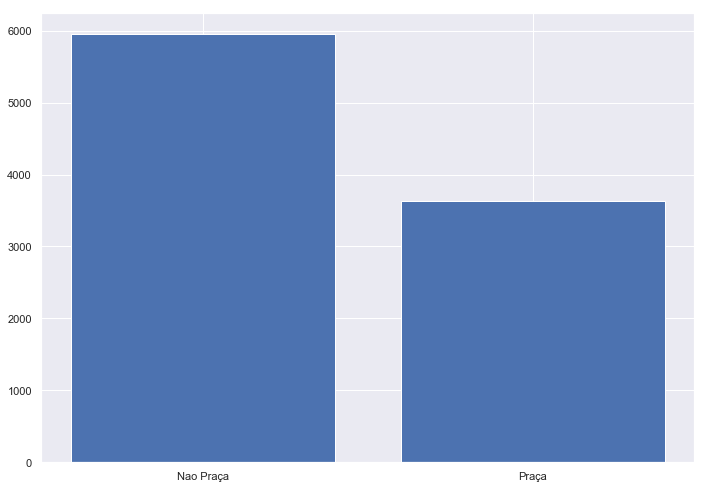

In [32]:
import matplotlib.pylab as plt
import seaborn as sns
classes = dict(df_not_unknow["CLASSE"].value_counts())
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.bar(range(len(classes)), list(classes.values()), align='center', tick_label=['Nao Praça', 'Praça'],)


### Concentração das classes por estado

In [33]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.countplot(y="UF_SEDE_CEDENTE", data=nao_praca)

In [34]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.countplot(y="UF_SEDE_CEDENTE", data=praca)

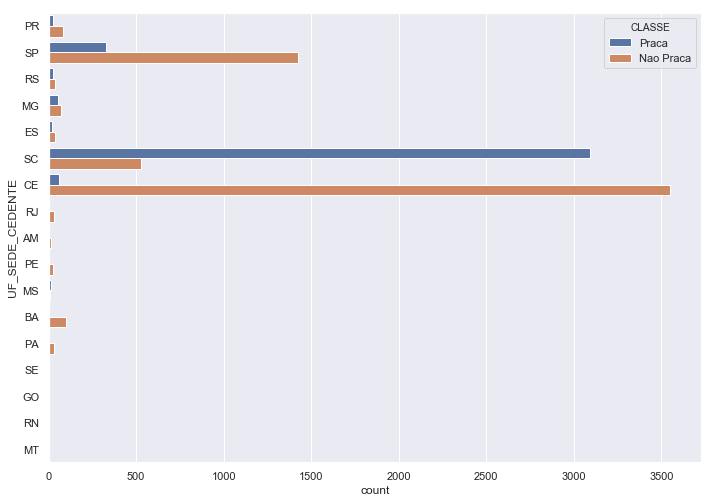

In [35]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cc = pd.concat([praca, nao_praca])
sns.countplot(hue = "CLASSE", y="UF_SEDE_CEDENTE", data=cc)

### Analisando o valor pago dos titulos por classe

In [36]:
pd.DataFrame(nao_praca["VALOR_PAGO_TITULO"].describe())

,VALOR_PAGO_TITULO
count,5951.000000
mean,9701.240591
std,21610.557809
min,0.000000
25%,1282.900000
50%,3278.910000
75%,8747.905000
max,261678.380000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002ADAE4BB1D0>]],
      dtype=object)

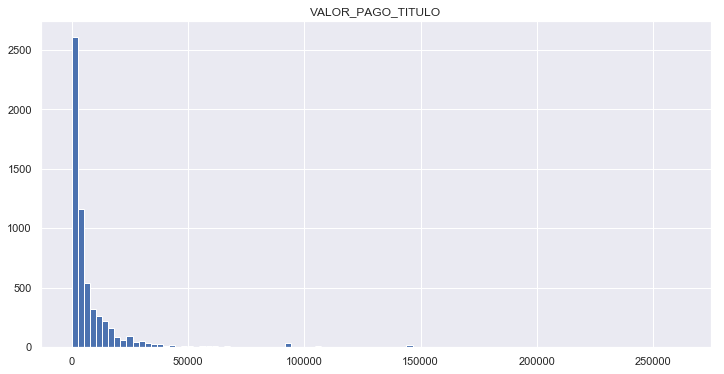

In [37]:
nao_praca.hist(column="VALOR_PAGO_TITULO", bins=100, figsize=(12,6), )

In [38]:
#nao_praca.boxplot(column="VALOR_PAGO_TITULO", by="CLASSE", figsize=(12,6))
#praca.boxplot(column="VALOR_PAGO_TITULO", by="CLASSE", figsize=(12,6))

### Analisando a plataforma e a classificação

In [39]:
#sns.countplot(y="PLATAFORMA", data=praca)

In [40]:
#sns.countplot(y="PLATAFORMA", data=nao_praca)

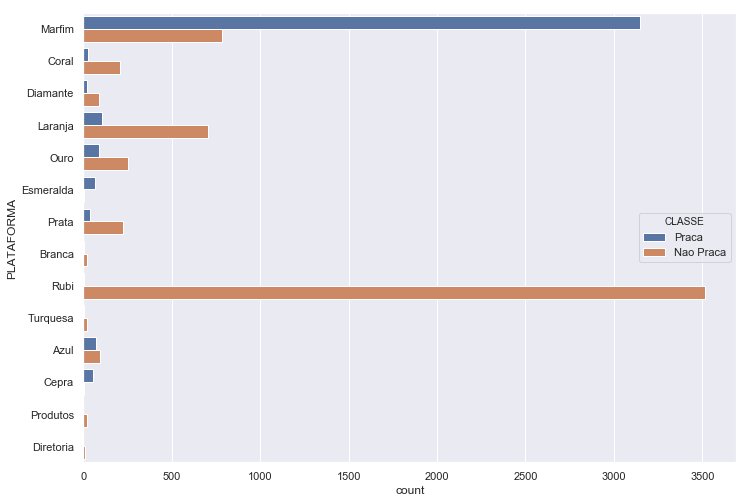

In [41]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cc = pd.concat([praca, nao_praca])
sns.countplot(hue = "CLASSE", y="PLATAFORMA", data=cc)

In [42]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.heatmap(df_not_unknow.corr(method='pearson', min_periods=1), 
#            fmt=".2f", annot=True,cmap="YlGnBu",
#            linewidths=.5)

# Análise Dados Processados

### QUANTIDADE EMISSÃO SEGUNDA VIA BOLETO TÍTULO

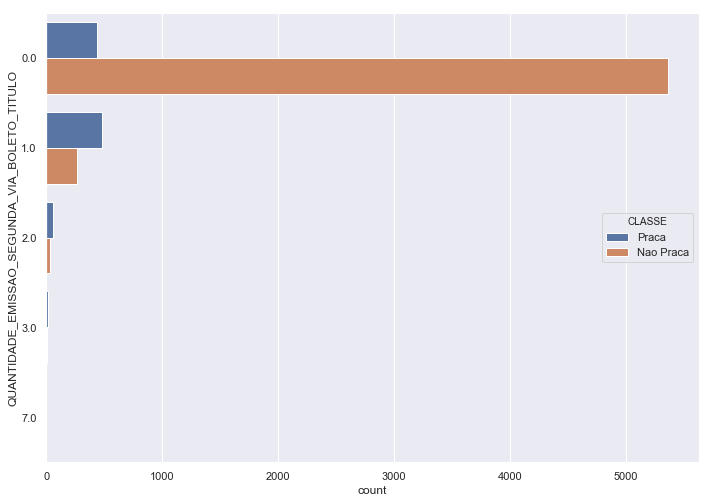

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cc = pd.concat([praca, nao_praca])
sns.countplot(hue = "CLASSE", y="QUANTIDADE_EMISSAO_SEGUNDA_VIA_BOLETO_TITULO", data=cc)

### TIPO CHECAGEM

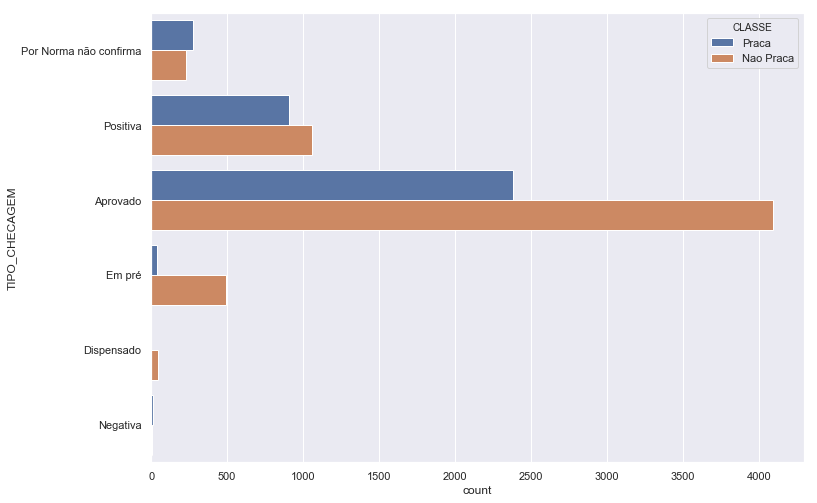

In [44]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cc = pd.concat([praca, nao_praca])
sns.countplot(hue = "CLASSE", y="TIPO_CHECAGEM", data=cc)

### PLATAFORMA

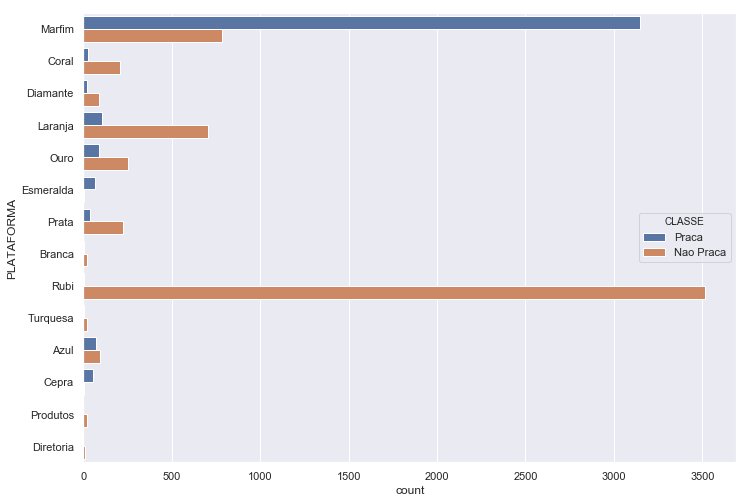

In [45]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cc = pd.concat([praca, nao_praca])
sns.countplot(hue = "CLASSE", y="PLATAFORMA", data=cc)

### DIST_CEDENTE_SACADO

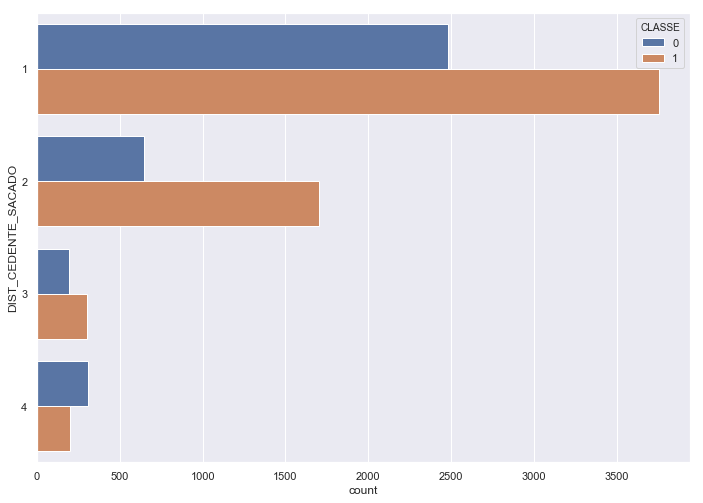

In [46]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#cc = pd.concat([praca, nao_praca])
sns.countplot(hue = "CLASSE", y="DIST_CEDENTE_SACADO", data=df_out_svm)

### DIST_CEDENTE_COBRANCA_CEDENTE

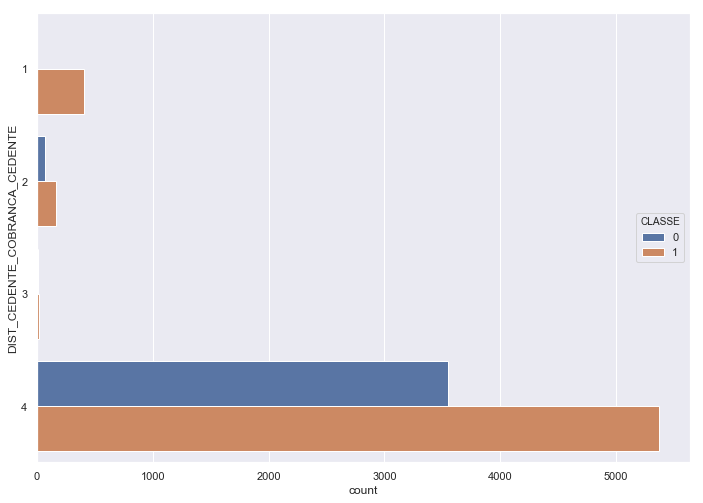

In [47]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#cc = pd.concat([praca, nao_praca])
sns.countplot(hue = "CLASSE", y="DIST_CEDENTE_COBRANCA_CEDENTE", data=df_out_svm)

### DIST_CEDENTE_COBRANCA_SACADO

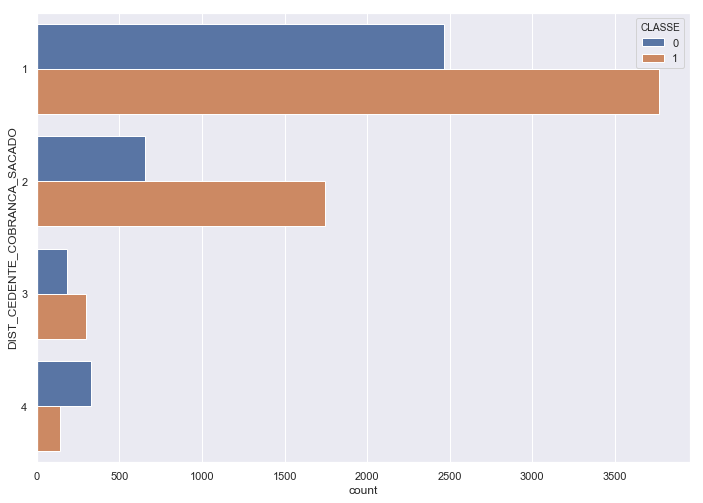

In [48]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#cc = pd.concat([praca, nao_praca])
sns.countplot(hue = "CLASSE", y="DIST_CEDENTE_COBRANCA_SACADO", data=df_out_svm)

### DIST_SACADO_COBRANCA_CEDENTE

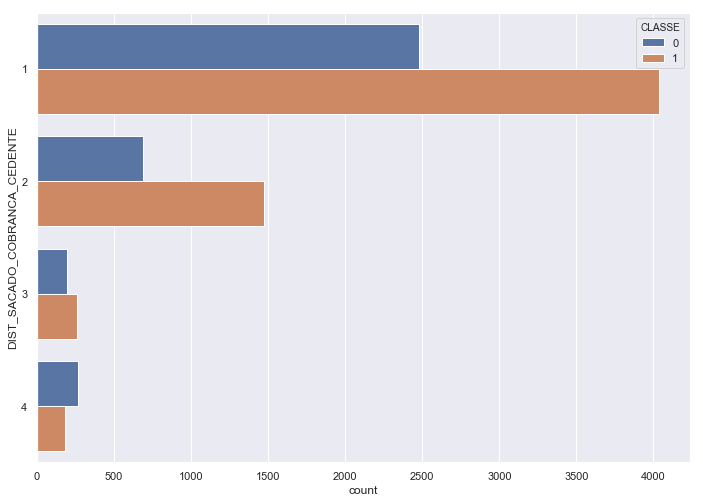

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#cc = pd.concat([praca, nao_praca])
sns.countplot(hue = "CLASSE", y="DIST_SACADO_COBRANCA_CEDENTE", data=df_out_svm)

### DIST_SACADO_COBRANCA_SACADO

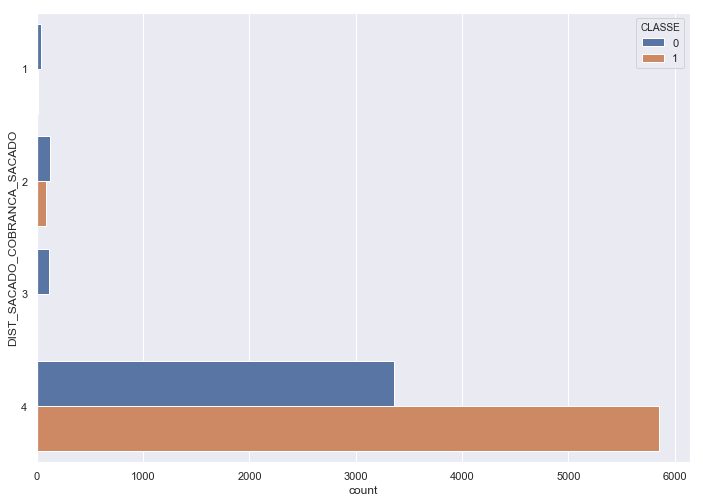

In [50]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#cc = pd.concat([praca, nao_praca])
sns.countplot(hue = "CLASSE", y="DIST_SACADO_COBRANCA_SACADO", data=df_out_svm)

### DIST_COBRANCA_CEDENTE_COBRANCA_SACADO

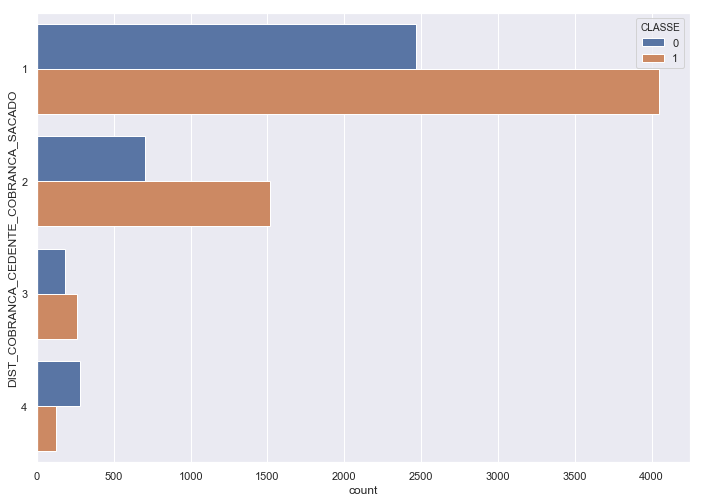

In [51]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#cc = pd.concat([praca, nao_praca])
sns.countplot(hue = "CLASSE", y="DIST_COBRANCA_CEDENTE_COBRANCA_SACADO", data=df_out_svm)

### VALOR_TITULO_CHECAGEM

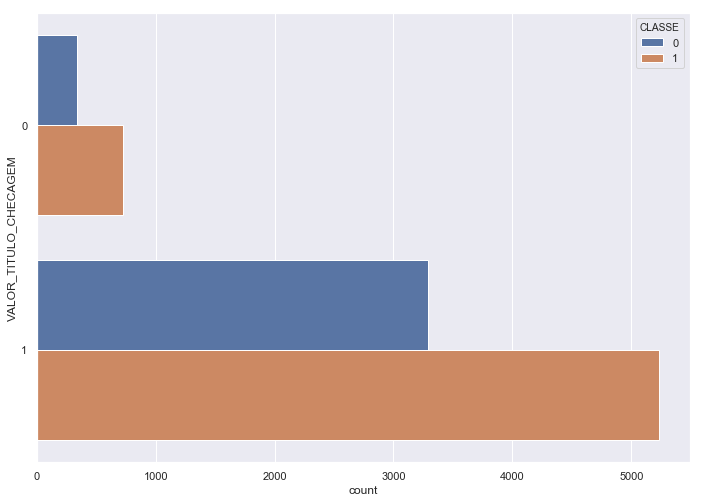

In [52]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#cc = pd.concat([praca, nao_praca])
sns.countplot(hue = "CLASSE", y="VALOR_TITULO_CHECAGEM", data=df_out_svm)

### DATA_TITULO

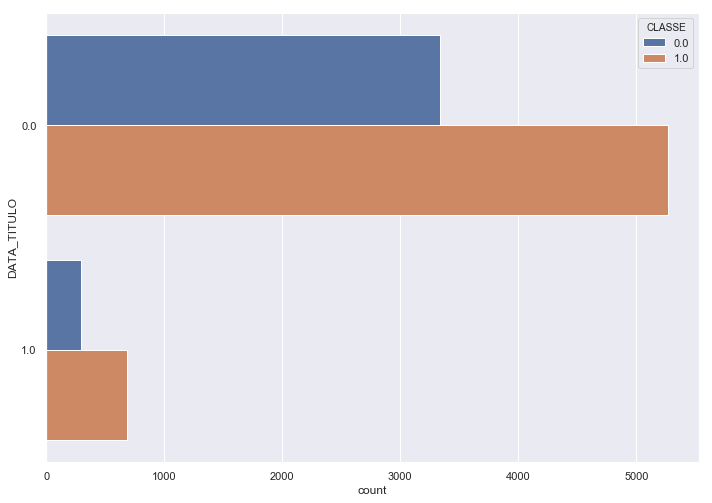

In [53]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#cc = pd.concat([praca, nao_praca])
sns.countplot(hue = "CLASSE", y="DATA_TITULO", data=df_not_unknow)

### BOXPLOT

In [54]:
#X_PRACA.boxplot(column="VALOR_TITULO_CHECAGEM", by="CLASSE", figsize=(12,6))
#X_NAO_PRACA.boxplot(column="VALOR_TITULO_CHECAGEM", by="CLASSE", figsize=(12,6))

### COVARÂNCIA

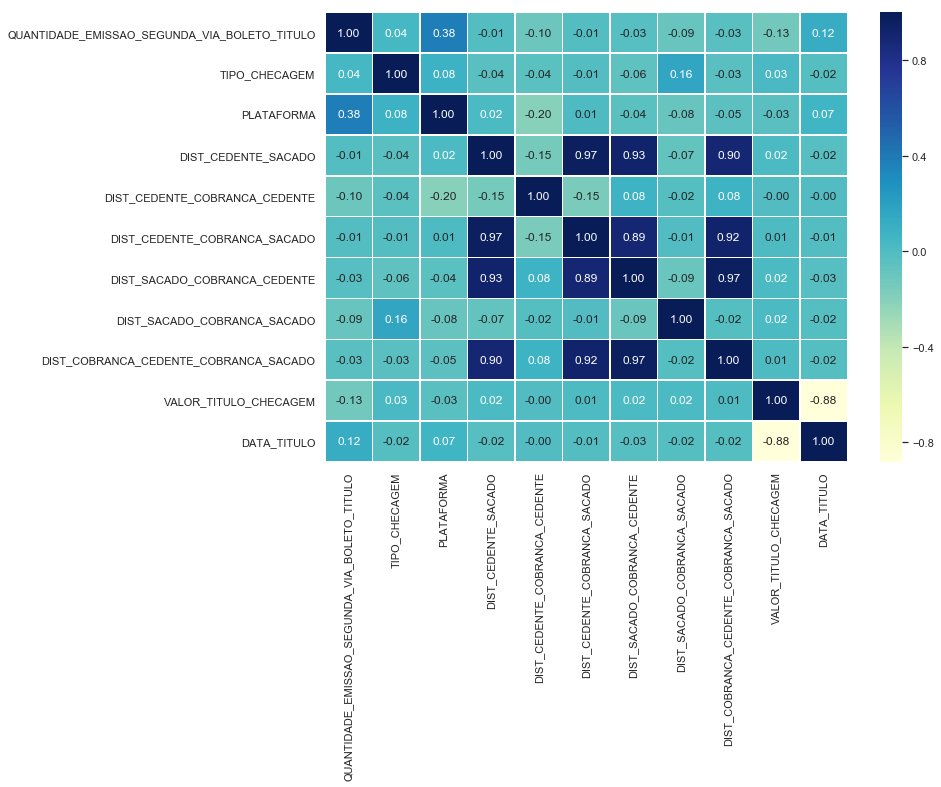

In [55]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_drop.corr(method='pearson', min_periods=1), 
            fmt=".2f", annot=True,cmap="YlGnBu",
            linewidths=.5)

In [56]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.heatmap(df_out_svm.corr(method='pearson', min_periods=1), 
#            fmt=".2f", annot=True,cmap="YlGnBu",
#            linewidths=.5)

# Classificação

A seguir os dados serão informados para algoritmos de aprendizado de máquina para que este possa classifica-los

In [57]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

c:\program files\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [58]:
def val_score(clf, X_PRACA, X_NAO_PRACA, nr = 1):
    
    times_run = nr

    fit_gini = [None] * times_run
    acc = [None] * times_run
    confusion = [None] * times_run

    for col in range(len(fit_gini)):

        X_PRACA = X_PRACA.sample(n=tam, replace=False)
        X_PRACA_TRAIN = X_PRACA[0:int((tam*2)/3)]
        X_PRACA_TEST = X_PRACA[int((tam*2)/3):]

        X_NAO_PRACA = X_NAO_PRACA.sample(n=tam, replace=False)
        X_NAO_PRACA_TRAIN = X_NAO_PRACA[0:int((tam*2)/3)]
        X_NAO_PRACA_TEST = X_NAO_PRACA[int((tam*2)/3):]

        X_TRAIN = pd.concat([X_PRACA_TRAIN,X_NAO_PRACA_TRAIN])
        X_TRAIN = X_TRAIN.sample(n=len(X_TRAIN), replace=False)
        X_DATA_TRAIN = X_TRAIN.drop("CLASSE", axis=1)
        Y_DATA_TRAIN = X_TRAIN['CLASSE']

        X_TEST = pd.concat([X_PRACA_TEST,X_NAO_PRACA_TEST])
        X_TEST = X_TEST.sample(n=len(X_TEST), replace=False)
        X_DATA_TEST = X_TEST.drop("CLASSE", axis=1)
        Y_DATA_TEST = X_TEST['CLASSE']

        fit_gini[col] = clf.fit(X_DATA_TRAIN, Y_DATA_TRAIN)

        Y_PREDICT = fit_gini[col].predict(X_DATA_TEST)
        acc[col] = accuracy_score(Y_DATA_TEST, Y_PREDICT)
        #fpr, tpr, th = roc_curve(Y_DATA_TEST, Y_PREDICT)

        #fpr
        #tpr
        #th

        #roc_auc = auc(fpr, tpr)

        # method I: plt
        #import matplotlib.pyplot as plt
        #plt.title('Curva Roc')
        #plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        #plt.legend(loc = 'lower right')
        #plt.plot([0, 1], [0, 1],'r--')
        #plt.xlim([0, 1])
        #plt.ylim([0, 1])
        #plt.ylabel('True Positive Rate')
        #plt.xlabel('False Positive Rate')
        #plt.show()

        confusion[col] = confusion_matrix(Y_DATA_TEST, Y_PREDICT)
    
    return acc, confusion

## Árvore de Decisão

In [86]:
alt = 5

clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=alt, 
                                  min_samples_leaf=3,
                                  min_samples_split=2,
                                 )

acc, confusion = val_score(clf_gini, X_PRACA, X_NAO_PRACA, 10)


In [87]:
acc

[0.9360033030553262,
 0.9397192402972749,
 0.9343517753922378,
 0.9339388934764657,
 0.9421965317919075,
 0.9409578860445913,
 0.9405450041288191,
 0.935177539223782,
 0.9368290668868704,
 0.9397192402972749]

In [88]:
for col in range(len(confusion)):
    print(str(col+1) + ")\n" + str(confusion[col]))

1)
[[1128   83]
 [  72 1139]]
2)
[[1129   82]
 [  64 1147]]
3)
[[1135   76]
 [  83 1128]]
4)
[[1136   75]
 [  85 1126]]
5)
[[1143   68]
 [  72 1139]]
6)
[[1142   69]
 [  74 1137]]
7)
[[1134   77]
 [  67 1144]]
8)
[[1138   73]
 [  84 1127]]
9)
[[1140   71]
 [  82 1129]]
10)
[[1138   73]
 [  73 1138]]


In [89]:
import graphviz

dot_data = tree.export_graphviz(clf_gini, out_file="out.dot", 
                                feature_names=df_drop.columns,
                                class_names=['NÃO PRAÇA','PRAÇA'],
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)

In [90]:
import pydot

(image,) = pydot.graph_from_dot_file('out.dot')
image.write_png("out" + str(alt) +".png")

## SVM

In [91]:
from sklearn import svm

clf_svm = svm.SVC(kernel='rbf')
#scores = cross_val_score(clf_svm, X, Y, cv=10)

acc, confusion = val_score(clf_svm, X_PRACA, X_NAO_PRACA, 10)

In [92]:
acc

[0.9265070189925682,
 0.9310487200660611,
 0.9293971924029728,
 0.9248554913294798,
 0.9293971924029728,
 0.9227910817506193,
 0.921552436003303,
 0.9298100743187449,
 0.9302229562345169,
 0.9302229562345169]

In [93]:
for col in range(len(confusion)):
    print(str(col+1) + ")\n" + str(confusion[col]))

1)
[[1138   73]
 [ 105 1106]]
2)
[[1147   64]
 [ 103 1108]]
3)
[[1146   65]
 [ 106 1105]]
4)
[[1143   68]
 [ 114 1097]]
5)
[[1150   61]
 [ 110 1101]]
6)
[[1137   74]
 [ 113 1098]]
7)
[[1137   74]
 [ 116 1095]]
8)
[[1135   76]
 [  94 1117]]
9)
[[1151   60]
 [ 109 1102]]
10)
[[1144   67]
 [ 102 1109]]


### Bayes

In [94]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB

clf_guassian = GaussianNB()

acc, confusion = val_score(clf_guassian, X_PRACA, X_NAO_PRACA, 10)

In [95]:
acc

[0.8711808422791082,
 0.85177539223782,
 0.8662262592898431,
 0.8728323699421965,
 0.8649876135425268,
 0.8583815028901735,
 0.8649876135425268,
 0.865813377374071,
 0.8625103220478944,
 0.8596201486374897]

In [96]:
for col in range(len(confusion)):
    print(str(col+1) + ")\n" + str(confusion[col]))

1)
[[1121   90]
 [ 222  989]]
2)
[[1110  101]
 [ 258  953]]
3)
[[1091  120]
 [ 204 1007]]
4)
[[1093  118]
 [ 190 1021]]
5)
[[1113   98]
 [ 229  982]]
6)
[[1114   97]
 [ 246  965]]
7)
[[1110  101]
 [ 226  985]]
8)
[[1114   97]
 [ 228  983]]
9)
[[1109  102]
 [ 231  980]]
10)
[[1117   94]
 [ 246  965]]


### Gradient Boosting

In [97]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, 
                                 max_depth=1, random_state=100)

acc, confusion = val_score(clf_gradient, X_PRACA, X_NAO_PRACA, 10)

In [98]:
acc

[0.9269199009083402,
 0.9335260115606936,
 0.9289843104872006,
 0.9339388934764657,
 0.9248554913294798,
 0.9314616019818331,
 0.9372419488026424,
 0.9298100743187449,
 0.9322873658133773,
 0.9380677126341866]

In [99]:
for col in range(len(confusion)):
    print(str(col+1) + ")\n" + str(confusion[col]))

1)
[[1141   70]
 [ 107 1104]]
2)
[[1137   74]
 [  87 1124]]
3)
[[1136   75]
 [  97 1114]]
4)
[[1138   73]
 [  87 1124]]
5)
[[1130   81]
 [ 101 1110]]
6)
[[1134   77]
 [  89 1122]]
7)
[[1141   70]
 [  82 1129]]
8)
[[1145   66]
 [ 104 1107]]
9)
[[1139   72]
 [  92 1119]]
10)
[[1148   63]
 [  87 1124]]


### Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

clf_rand_forest = RandomForestClassifier(max_depth=2, random_state=100)

acc, confusion = val_score(clf_rand_forest, X_PRACA, X_NAO_PRACA, 10)

In [101]:
acc

[0.9037985136251032,
 0.8926507018992568,
 0.8885218827415359,
 0.8938893476465731,
 0.8984310487200661,
 0.8864574731626754,
 0.9000825763831544,
 0.8976052848885219,
 0.9050371593724195,
 0.8914120561519405]

In [102]:
for col in range(len(confusion)):
    print(str(col+1) + ")\n" + str(confusion[col]))

1)
[[1037  174]
 [  59 1152]]
2)
[[1025  186]
 [  74 1137]]
3)
[[1008  203]
 [  67 1144]]
4)
[[1029  182]
 [  75 1136]]
5)
[[1041  170]
 [  76 1135]]
6)
[[1004  207]
 [  68 1143]]
7)
[[1043  168]
 [  74 1137]]
8)
[[1033  178]
 [  70 1141]]
9)
[[1038  173]
 [  57 1154]]
10)
[[1015  196]
 [  67 1144]]


### MLP

In [103]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier()

acc, confusion = val_score(clf_mlp, X_PRACA, X_NAO_PRACA, 10)

In [104]:
acc

[0.9327002477291495,
 0.9293971924029728,
 0.9417836498761354,
 0.9318744838976053,
 0.935177539223782,
 0.9302229562345169,
 0.9413707679603633,
 0.9331131296449215,
 0.9322873658133773,
 0.935177539223782]

In [105]:
for col in range(len(confusion)):
    print(str(col+1) + ")\n" + str(confusion[col]))

1)
[[1138   73]
 [  90 1121]]
2)
[[1147   64]
 [ 107 1104]]
3)
[[1151   60]
 [  81 1130]]
4)
[[1136   75]
 [  90 1121]]
5)
[[1149   62]
 [  95 1116]]
6)
[[1129   82]
 [  87 1124]]
7)
[[1151   60]
 [  82 1129]]
8)
[[1141   70]
 [  92 1119]]
9)
[[1122   89]
 [  75 1136]]
10)
[[1137   74]
 [  83 1128]]
